## Seasonality and Trend in a Time Series
#
## We illustrate 2 methods. 

- Using Statsmodel Lowess STL  (from statsmodels.tsa.seasonal import STL)
- Using the x13_arima_analysis (from statsmodels.tsa.x13 import x13_arima_analysis)

All data and code taken from statsmodel documentation.
## See
-
-https://www.statsmodels.org/stable/generated/statsmodels.tsa.x13.x13_arima_analysis.html#statsmodels.tsa.x13.x13_arima_analysis
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.DecomposeResult.html#statsmodels.tsa.seasonal.DecomposeResult



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")


In [3]:
# co2 data

In [4]:
co2 = [
    315.58,
    316.39,
    316.79,
    317.82,
    318.39,
    318.22,
    316.68,
    315.01,
    314.02,
    313.55,
    315.02,
    315.75,
    316.52,
    317.10,
    317.79,
    319.22,
    320.08,
    319.70,
    318.27,
    315.99,
    314.24,
    314.05,
    315.05,
    316.23,
    316.92,
    317.76,
    318.54,
    319.49,
    320.64,
    319.85,
    318.70,
    316.96,
    315.17,
    315.47,
    316.19,
    317.17,
    318.12,
    318.72,
    319.79,
    320.68,
    321.28,
    320.89,
    319.79,
    317.56,
    316.46,
    315.59,
    316.85,
    317.87,
    318.87,
    319.25,
    320.13,
    321.49,
    322.34,
    321.62,
    319.85,
    317.87,
    316.36,
    316.24,
    317.13,
    318.46,
    319.57,
    320.23,
    320.89,
    321.54,
    322.20,
    321.90,
    320.42,
    318.60,
    316.73,
    317.15,
    317.94,
    318.91,
    319.73,
    320.78,
    321.23,
    322.49,
    322.59,
    322.35,
    321.61,
    319.24,
    318.23,
    317.76,
    319.36,
    319.50,
    320.35,
    321.40,
    322.22,
    323.45,
    323.80,
    323.50,
    322.16,
    320.09,
    318.26,
    317.66,
    319.47,
    320.70,
    322.06,
    322.23,
    322.78,
    324.10,
    324.63,
    323.79,
    322.34,
    320.73,
    319.00,
    318.99,
    320.41,
    321.68,
    322.30,
    322.89,
    323.59,
    324.65,
    325.30,
    325.15,
    323.88,
    321.80,
    319.99,
    319.86,
    320.88,
    322.36,
    323.59,
    324.23,
    325.34,
    326.33,
    327.03,
    326.24,
    325.39,
    323.16,
    321.87,
    321.31,
    322.34,
    323.74,
    324.61,
    325.58,
    326.55,
    327.81,
    327.82,
    327.53,
    326.29,
    324.66,
    323.12,
    323.09,
    324.01,
    325.10,
    326.12,
    326.62,
    327.16,
    327.94,
    329.15,
    328.79,
    327.53,
    325.65,
    323.60,
    323.78,
    325.13,
    326.26,
    326.93,
    327.84,
    327.96,
    329.93,
    330.25,
    329.24,
    328.13,
    326.42,
    324.97,
    325.29,
    326.56,
    327.73,
    328.73,
    329.70,
    330.46,
    331.70,
    332.66,
    332.22,
    331.02,
    329.39,
    327.58,
    327.27,
    328.30,
    328.81,
    329.44,
    330.89,
    331.62,
    332.85,
    333.29,
    332.44,
    331.35,
    329.58,
    327.58,
    327.55,
    328.56,
    329.73,
    330.45,
    330.98,
    331.63,
    332.88,
    333.63,
    333.53,
    331.90,
    330.08,
    328.59,
    328.31,
    329.44,
    330.64,
    331.62,
    332.45,
    333.36,
    334.46,
    334.84,
    334.29,
    333.04,
    330.88,
    329.23,
    328.83,
    330.18,
    331.50,
    332.80,
    333.22,
    334.54,
    335.82,
    336.45,
    335.97,
    334.65,
    332.40,
    331.28,
    330.73,
    332.05,
    333.54,
    334.65,
    335.06,
    336.32,
    337.39,
    337.66,
    337.56,
    336.24,
    334.39,
    332.43,
    332.22,
    333.61,
    334.78,
    335.88,
    336.43,
    337.61,
    338.53,
    339.06,
    338.92,
    337.39,
    335.72,
    333.64,
    333.65,
    335.07,
    336.53,
    337.82,
    338.19,
    339.89,
    340.56,
    341.22,
    340.92,
    339.26,
    337.27,
    335.66,
    335.54,
    336.71,
    337.79,
    338.79,
    340.06,
    340.93,
    342.02,
    342.65,
    341.80,
    340.01,
    337.94,
    336.17,
    336.28,
    337.76,
    339.05,
    340.18,
    341.04,
    342.16,
    343.01,
    343.64,
    342.91,
    341.72,
    339.52,
    337.75,
    337.68,
    339.14,
    340.37,
    341.32,
    342.45,
    343.05,
    344.91,
    345.77,
    345.30,
    343.98,
    342.41,
    339.89,
    340.03,
    341.19,
    342.87,
    343.74,
    344.55,
    345.28,
    347.00,
    347.37,
    346.74,
    345.36,
    343.19,
    340.97,
    341.20,
    342.76,
    343.96,
    344.82,
    345.82,
    347.24,
    348.09,
    348.66,
    347.90,
    346.27,
    344.21,
    342.88,
    342.58,
    343.99,
    345.31,
    345.98,
    346.72,
    347.63,
    349.24,
    349.83,
    349.10,
    347.52,
    345.43,
    344.48,
    343.89,
    345.29,
    346.54,
    347.66,
    348.07,
    349.12,
    350.55,
    351.34,
    350.80,
    349.10,
    347.54,
    346.20,
    346.20,
    347.44,
    348.67,
]
co2 = pd.Series(
    co2, index=pd.date_range("1-1-1959", periods=len(co2), freq="M"), name="CO2"
)
co2.describe()


count    348.000000
mean     330.123879
std       10.059747
min      313.550000
25%      321.302500
50%      328.820000
75%      338.002500
max      351.340000
Name: CO2, dtype: float64

# Statsmodel seasonal decomposition using LOWESS smoother
- https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html

In [33]:
from statsmodels.tsa.seasonal import STL
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.DecomposeResult.html#statsmodels.tsa.seasonal.DecomposeResult
stl = STL(co2, seasonal=13)
res = stl.fit()

# examine the results
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.DecomposeResult.html


<Axes: >

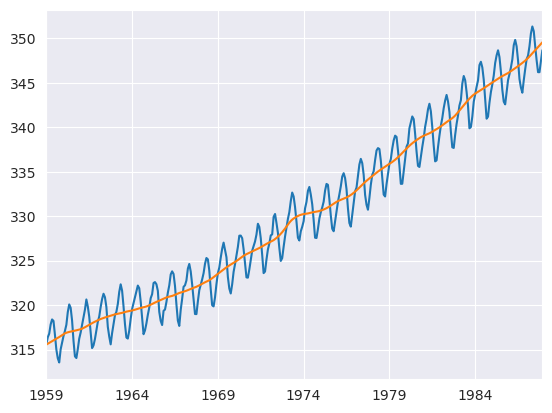

In [34]:
res.observed.plot()
res.trend.plot()

In [35]:
# the total observed is:

res_total = res.trend + res.seasonal + res.resid


<Axes: >

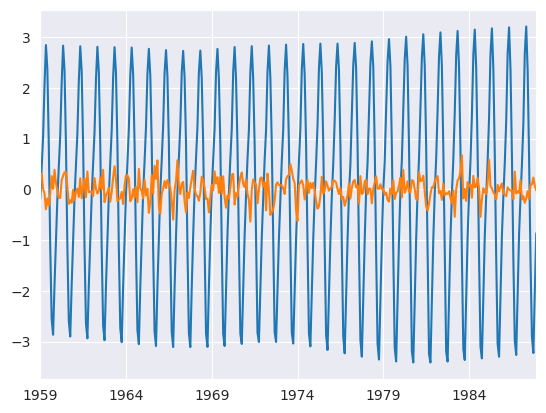

In [36]:
res.seasonal.plot()
res.resid.plot()

<Axes: >

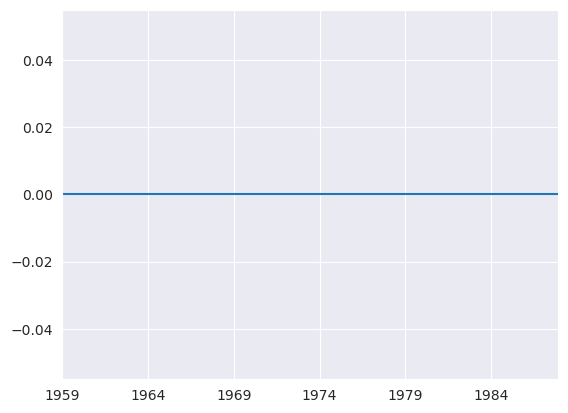

In [38]:
# confirm that the observed is a sum of trend + seasonality + residual

(res_total-res.observed).plot()


# Now using x13_arima_analysis

In [40]:
from statsmodels.tsa.x13 import x13_arima_analysis

x13results = x13_arima_analysis(endog = co2, 
                                x12path= '../../../3rdparty/x13as/x13as/', 
                                outlier=True,print_stdout=True)

b''


/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/statsmodels/tsa/x13.py:189: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


# examine the results
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.x13.x13_arima_analysis.html#statsmodels.tsa.x13.x13_arima_analysis

The call to x13_arima_analysis returns a bunch with

In [42]:
#for detailed output
#print(x13results.results)

<Axes: >

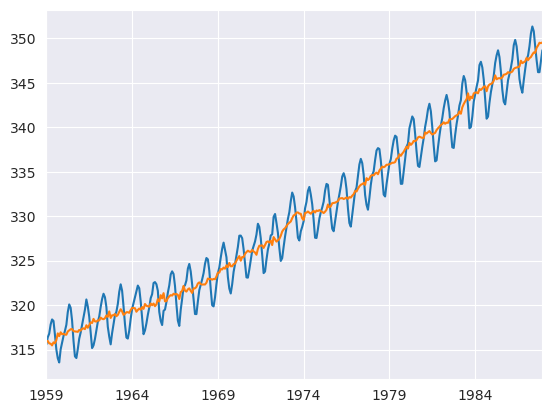

In [47]:
# trend
co2.plot()
x13results.seasadj.plot()


<Axes: >

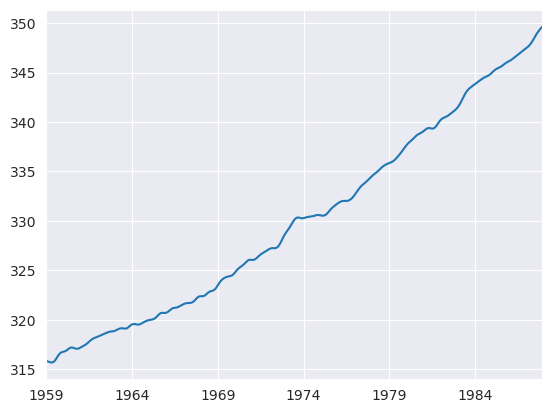

In [49]:
# trend 
x13results.trend.plot()


<Axes: >

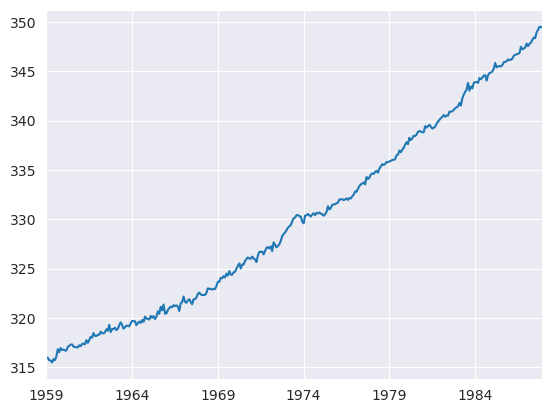

In [50]:
# Seasonally adjusted
x13results.seasadj.plot()

<Axes: >

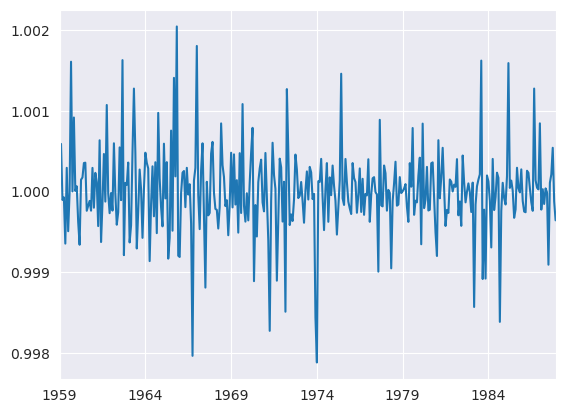

In [51]:
# irregular part
x13results.irregular.plot()

<Axes: >

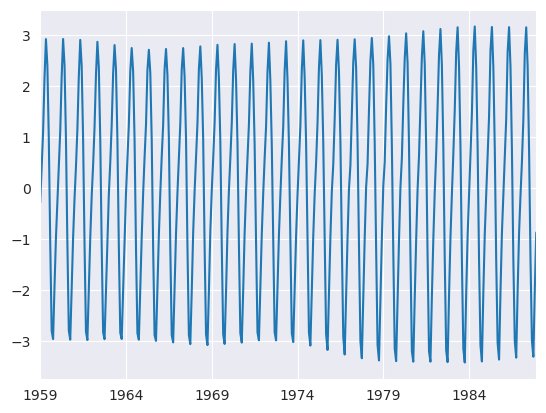

In [53]:
# seasonal part
seas = co2 - x13results.seasadj
seas.plot()

# compare the LOWESS and x13 results

<Axes: >

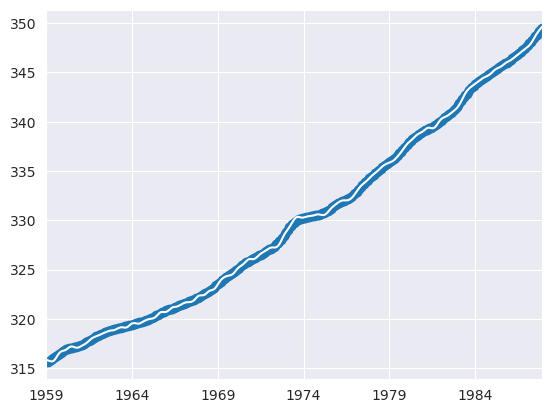

In [61]:
# trend
res.trend.plot(marker='o')
x13results.trend.plot(color='w')



<Axes: >

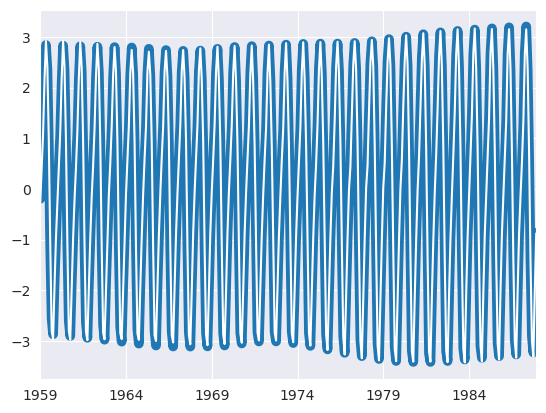

In [67]:
# seasonality

res.seasonal.plot(linewidth = 7)
seas.plot(color='w')
